In [2]:
import librosa

Original code provided in README of TIMNET

In [41]:
def get_feature(file_path: str, mfcc_len: int = 39, mean_signal_length: int = 100000):
    """
    file_path: Speech signal folder
    mfcc_len: MFCC coefficient length
    mean_signal_length: MFCC feature average length
    """
    signal, fs = librosa.load(file_path)
    s_len = len(signal)

    if s_len < mean_signal_length:
        pad_len = mean_signal_length - s_len
        pad_rem = pad_len % 2
        pad_len //= 2
        signal = np.pad(signal, (pad_len, pad_len + pad_rem), 'constant', constant_values = 0)
    else:
        pad_len = s_len - mean_signal_length
        pad_len //= 2
        signal = signal[pad_len:pad_len + mean_signal_length]
    mfcc = librosa.feature.mfcc(y=signal, sr=fs, n_mfcc=39)
    mfcc = mfcc.T
    feature = mfcc
    return feature

In [7]:
signal, fs = librosa.load('../../dataset_samples/EMOVO/f1/dis-f1-b1.wav')

In [54]:
signal_pad = np.pad(signal, (5000, 5000), 'constant', constant_values=0)

In [57]:
librosa.feature.mfcc(y=signal_pad, sr=fs, n_mfcc=39).T

array([[-615.3883,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [-615.3883,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [-615.3883,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [-615.3883,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [-615.3883,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [-615.3883,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

In [12]:
## audio signal player
from IPython.display import Audio

Audio(data=signal, rate=fs)

See distribution of dataset

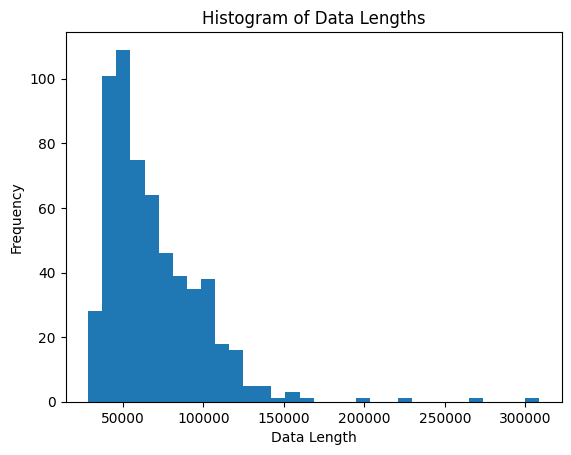

In [17]:
import os
import matplotlib.pyplot as plt

def read_length(path):
    signal, _ = librosa.load(path)
    return len(signal)


def get_data_lengths(parent_folder):
    lengths = []
    for root, dirs, files in os.walk(parent_folder):
        for file in files:
            if file.endswith('.wav'):
                data_path = os.path.join(root, file)
                length = read_length(data_path)
                lengths.append(length)
    return lengths

def plot_histogram(parent_folder):
    data_lengths = get_data_lengths(parent_folder)
    plt.hist(data_lengths, bins='auto')
    plt.title("Histogram of Data Lengths")
    plt.xlabel("Data Length")
    plt.ylabel("Frequency")
    plt.show()

# Call the function with your directory path
plot_histogram('../../dataset_samples/EMOVO')



New feature extraction method & Convert all data into arrays

In [18]:
test_dir = '../../dataset_samples/EMOVO'

In [27]:
labels = ['disgusto', 'gioia', 'paura', 'rabbia', 'sorpresa', 'tristezza', 'neutro']
num_labels = len(labels)
label_dict = {s[:3]: s for s in labels}
output_dict = {s: i for i, s in enumerate(labels)}

In [28]:
import numpy as np

def get_label_vector(file_name):
    emotion = label_dict[file_name[:3]]
    v = np.zeros(num_labels)
    v[output_dict[emotion]] = 1
    return v
    

In [35]:
from pathlib import Path

def get_feature_by_padding(file_path: str, max_len: int, mfcc_len: int = 39):
    
    signal, fs = librosa.load(file_path)
    s_len = len(signal)
    
    assert s_len <= max_len

    pad_len = max_len - s_len
    pad_rem = pad_len % 2
    pad_len //= 2
    signal = np.pad(signal, (pad_len, pad_len + pad_rem), 'constant', constant_values = 0)

    mfcc = librosa.feature.mfcc(y=signal, sr=fs, n_mfcc=39)
    x = mfcc.T

    y = get_label_vector(Path(file_path).stem)
    return x, y

In [44]:
get_feature('../../dataset_samples/EMOVO/f1/dis-f1-b1.wav')

array([[-609.90564,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [-609.90564,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [-609.90564,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [-609.90564,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [-609.90564,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [-609.90564,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [36]:
from tqdm import tqdm

xs = []
ys = []
max_len = max(get_data_lengths(test_dir))
for root, dirs, files in os.walk(test_dir):
    for file in tqdm(files):
        if file.endswith('.wav'):
            x, y = get_feature_by_padding(os.path.join(root, file), max_len)
            xs.append(x)
            ys.append(y)

100%|███████████████████████████████████████████| 98/98 [00:01<00:00, 63.92it/s]


In [61]:
xs[90][0]

array([-631.1013,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ], dtype=float32)